In [34]:
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2

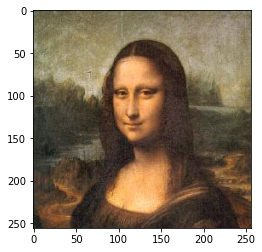

In [35]:
input = cv2.imread('/data_lids/home/andreigor/workspace/mo443/Dithering/images/monalisa.png')
image=np.zeros(input.shape,np.uint8)
image[:,:,0]=input[:,:,2]
image[:,:,1]=input[:,:,1]
image[:,:,2]=input[:,:,0]
plt.imshow(image)
plt.show()

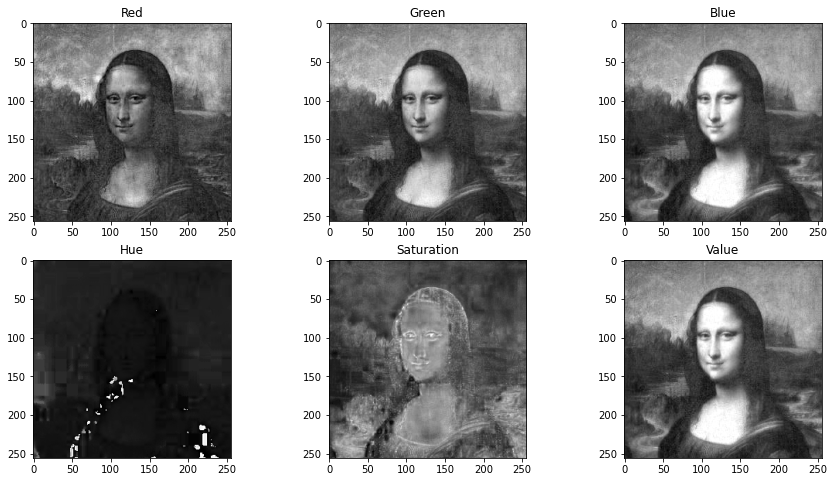

In [36]:
hsv_image=cv2.cvtColor(input, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.imshow(image[:,:,2],cmap="gray")
plt.title('Red')
plt.subplot(2,3,2)
plt.imshow(image[:,:,1],cmap="gray")
plt.title('Green')
plt.subplot(2,3,3)
plt.imshow(image[:,:,0],cmap="gray")
plt.title('Blue')

plt.subplot(2,3,4)
plt.imshow(hsv_image[:,:,0],cmap="gray")
plt.title('Hue')
plt.subplot(2,3,5)
plt.imshow(hsv_image[:,:,1],cmap="gray")
plt.title('Saturation')
plt.subplot(2,3,6)
plt.imshow(hsv_image[:,:,2],cmap="gray")
plt.title('Value')
plt.show()

In [6]:
#import warnings
#warnings.filterwarnings('error')
f = hsv_image[:,:,2].copy()
g = f.copy()
for x in range(f.shape[0]):
    for y in range(f.shape[1]):
        if f[x,y] < 128:
            g[x,y] = 0
        else:
            g[x,y] = 255
        erro = int(f[x,y]) - int(g[x,y]) 
        
        try:
            f[x, y + 1]     = f[x, y + 1] + (7/16) * erro
        except IndexError:
            pass
        try:
            f[x + 1, y - 1] = f[x + 1, y - 1] + (3/16) * erro
        except IndexError:
            pass
        try:
            f[x + 1, y]     = f[x + 1, y] + (5/16) * erro
        except IndexError:
            pass
        try:
            f[x + 1, y + 1] = f[x + 1, y + 1] + (1/16) * erro
        except IndexError:
            pass
        
        
        


In [66]:
f.shape

(256, 256)

In [67]:
def get_index_from_direction(image, x, y, direction):
    n_cols = image.shape[1] - 1
    i = x
    j = y
    if direction == 'left':
        j = n_cols - y
    
    return i, j


In [68]:
def new_image_value(image, i, j):
    if image[i, j] < 128:
        value = 0
    else:
        value = 1
    return value

In [82]:
class FloidSteinbergMask():
    def __init__(self, direction):
        self.displacements = self.get_displacements(direction)
        self.weights = self.get_weights()
    
    def get_displacements(self, direction):
        direction = 1 if direction == 'right' else -1
        displacements = [[0, direction *  1],
                         [1, direction * -1],
                         [1, direction *  0],
                         [1, direction *  1]]
        return displacements
    def get_weights(self):
        weights = [7/16, 3/16, 5/16, 1/16]
        return weights

class StevensonMask():
    def __init__(self, direction):
        self.displacements = self.get_displacements(direction)
        self.weights = self.get_weights()
    
    def get_displacements(self, direction):
        direction = 1 if direction == 'right' else -1
        displacements = [[0, direction *  2],  [1, direction * -3], [1, direction *  -1], [1, direction *  1],
                         [1, direction *  3],  [2, direction * -2], [2, direction *   0], [2, direction *  2],
                         [3, direction *  -3], [3, direction * -1], [3, direction *   1], [3, direction *  3]
                         ]
        return displacements
    def get_weights(self):
        weights = [32/200, 12/200, 26/200, 30/200, 16/200, 12/200,
                   26/200, 12/200, 5/200, 12/200, 12/200, 5/200]
        return weights

class BurkesMask():
    def __init__(self, direction):
        self.displacements = self.get_displacements(direction)
        self.weights = self.get_weights()
    
    def get_displacements(self, direction):
        direction = 1 if direction == 'right' else -1
        displacements = [[0, direction *   1],
                         [0, direction *   2],
                         [1, direction *  -2],
                         [1, direction *  -1],
                         [1, direction *   0],
                         [1, direction *   1],
                         [1, direction *   2]
                         ]
        return displacements
    def get_weights(self):
        weights = [8/32, 4/32, 2/32, 4/32, 8/32, 4/32, 2/32]
        return weights


In [70]:
def calculate_error(f, g, i, j):
    return int(f[i,j]) - int(g[i,j] * 255)
def difuse_error(f, error, mask, i, j):
    for displacement, weight in zip(mask.displacements, mask.weights):
        try:
            f[i + displacement[0], j + displacement[1]] += weight * error
        except IndexError:
            pass

In [83]:
f = hsv_image[:,:,2].copy()
g = f.copy()
direction = 'left'
for x in range(f.shape[0]):
    for y in range(f.shape[1]):
        direction = 'left'
        if (x % 2 == 0):
            direction = 'right'
        
        mask = BurkesMask(direction)
        
        i, j = get_index_from_direction(f, x, y, direction)
        g[i,j] = new_image_value(f, i, j)
        error = calculate_error(f, g, i, j)
        difuse_error(f, error, mask, i, j)

g = g * 255
        
        


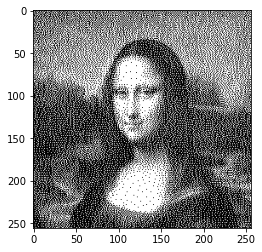

In [84]:
plt.imshow(g , cmap = 'gray')


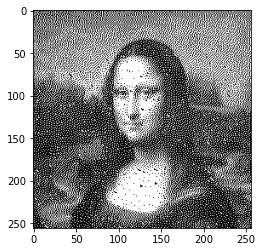

In [72]:
plt.imshow(g , cmap = 'gray')

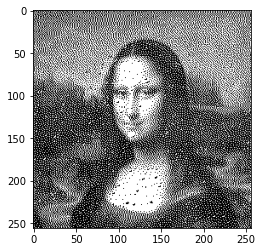

In [62]:
plt.imshow(g , cmap = 'gray')

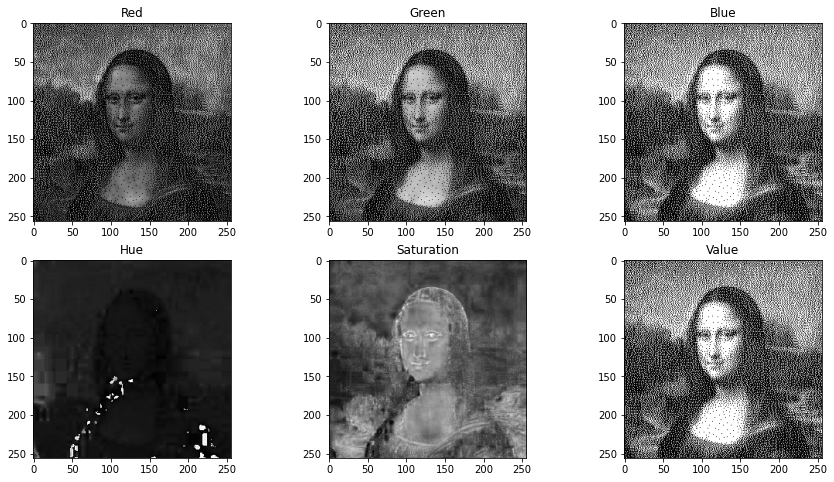

In [85]:
output = np.zeros(hsv_image.shape,np.uint8)
output[:,:,2]=g
output[:,:,1]=hsv_image[:,:,1]
output[:,:,0]=hsv_image[:,:,0]

rgb_output = cv2.cvtColor(output, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.imshow(rgb_output[:,:,2],cmap="gray")
plt.title('Red')
plt.subplot(2,3,2)
plt.imshow(rgb_output[:,:,1],cmap="gray")
plt.title('Green')
plt.subplot(2,3,3)
plt.imshow(rgb_output[:,:,0],cmap="gray")
plt.title('Blue')

plt.subplot(2,3,4)
plt.imshow(output[:,:,0],cmap="gray")
plt.title('Hue')
plt.subplot(2,3,5)
plt.imshow(output[:,:,1],cmap="gray")
plt.title('Saturation')
plt.subplot(2,3,6)
plt.imshow(output[:,:,2],cmap="gray")
plt.title('Value')
plt.show()

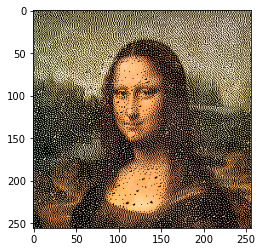

In [64]:
plt.imshow(rgb_output)

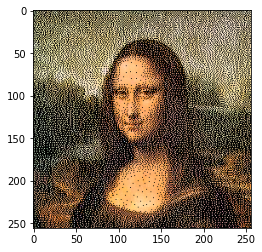

In [86]:
plt.imshow(rgb_output)